# 01. PyTorch Workflow Fundamentals

In [67]:
import torch
from torch import nn                # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt     # for plotting data

torch.__version__                   # check PyTorch version

'2.7.1'

In [68]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

## 1. Data: Preparing & Loading

In machine learning, **data can be anything**: numbers, images, text, audio, etc.

ML is about:
1. Turning data into numbers (representations)
2. Training models to learn those representations

### Create Sample Data:

In [69]:
weight = 0.7        # Weight of the linear function
bias = 0.3          # Bias of the linear function

# Create input and output tensors
X = torch.arange(0, 1, 0.02).unsqueeze(1)
y = weight * X + bias       # y = mx + b (we are using a linear function here, its what the model will learn)

> `torch.arange(0, 1, 0.02)` Creates evenly spaced input values from 0 to just under 1, like [0.00, 0.02, 0.04, ..., 0.98]

> `.unsqueeze(1)` Changes shape from (N,) to (N, 1) → required for matrix-based models.

> `y = weight * X + bias` Generates the corresponding output values using the linear equation.


Why we do this?:
- To simulate realistic data with known parameters.
- So we can train a model and test whether it can learn to recover weight = 0.7 and bias = 0.3 using gradient descent.

### Train/Test Split

Split data so the model can learn on one part and be evaluated on another:

| Split | Purpose | Typical Size|
|-------|---------|-------------|
| Train | Model learns here | ~80% |
| Test  | Model is evaluated here | ~20% |

In [70]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

The model we create is going to try and learn the relationship between `X_train` & `y_train` and then we will evaluate what it learns on `X_test` and `y_test`.

### Visualize the Data

Plot training and test data:

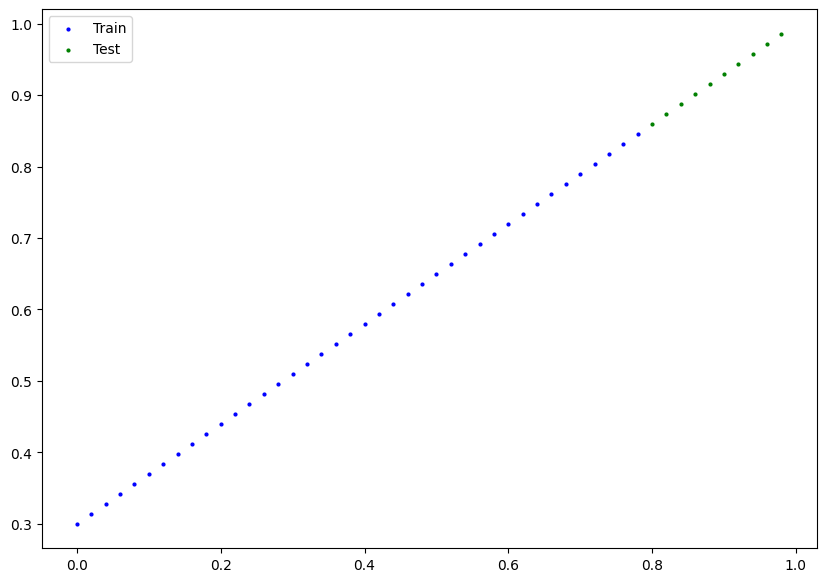

In [71]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Train")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend()

plot_predictions(X_train, y_train, X_test, y_test)

## 2. Build a Linear Model

We’ll build a simple **linear regression model** using PyTorch to learn from our synthetic data.

### Define the Model:

In [72]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float32, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32, requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias  # y = w*x + b

<img src="imgs/PyTorch-model-building-blocks.png" alt="Tensor visualization" width="800"/>

### PyTorch Core Modules

| Module | Purpose |
| --- | --- |
| torch.nn | Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).|
| nn.Parameter | Stores tensors that can be used with `nn.Module`. If `requires_grad=True` gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd". |
| nn.Module | The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method be implemented. |
| torch.optim | Contains various optimization algorithms (these tell the model parameters stored in `nn.Parameter` how to best change to improve gradient descent and in turn reduce the loss). |
| def forward() | All `nn.Module` subclasses require a `forward()` method, this defines the computation that will take place on the data passed to the particular `nn.Module` (e.g. the linear regression formula above). | 

### Checking the contents of a PyTorch model

In [74]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [75]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Make Predictions (Before Training)

Use `torch.inference_mode()` to make predictions without tracking gradients (faster and cleaner for inference):